In [453]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import chi2, norm
import matplotlib.ticker as ticker

# № 2

ОМП для мультиномиального распределения: $$\hat{p_i} = \frac{n_i}{n}$$ Матрица ковариации: $$\Sigma(\hat{p})= 
\begin{pmatrix}
\hat{p_1}(1-\hat{p_1}) & -\hat{p_1}\hat{p_2} \\
-\hat{p_1}\hat{p_2} & \hat{p_2}(1-\hat{p_2}) 
\end{pmatrix}$$

In [147]:
input_table = pd.read_csv('test.csv')
input_table

,1,2,3,4,5,6,7,8,9
0,3,10,16,13,16,19,18,13,10


In [148]:
input_array = np.array(input_table.iloc[0])

In [407]:
def covariance_matrix(estimations_ls):
    p1, p2 = estimations_ls
    matrix = np.array([[p1*(1-p1), -p1*p2],
                       [-p1*p2, p2*(1-p2)]]
                     )
    return matrix

In [408]:
bad_guys = sum(input_array[:5])
middle_guys = sum(input_array[5:7])
good_guys = sum(input_array[7:])
gen_count = sum(input_array)
estimations = np.array([good_guys, middle_guys]) / gen_count
cov_matrix = covariance_matrix(estimations)
inv_matrix = np.linalg.inv(cov_matrix)

In [409]:
p1 = np.linspace(0, 1, 1000)
p2 = np.linspace(0, 1, 1000)
P1, P2 = np.meshgrid(p1, p2)
P1 = estimations[0] - P1
P2 = estimations[1] - P2
F = inv_matrix[0][0]*P1**2 + inv_matrix[1][1]*P2**2 + 2*inv_matrix[0][1]*P1*P2 

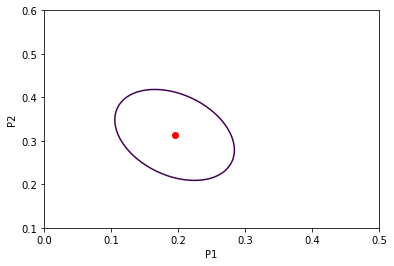

In [413]:
alpha = 0.05
quantile = chi2.ppf(q=1-alpha, df=2) / gen_count
plt.contour(P1+estimations[0], P2+estimations[1], F, [quantile])
plt.xlabel('P1')
plt.ylabel('P2')
plt.xlim([0, 0.5])
plt.ylim([0.1, 0.6])
plt.scatter(estimations[0], estimations[1], color='red')
plt.show()

# № 3

In [478]:
input_str = str()
with open('Inspection Data.txt', 'r') as file:
    for row in file:
        input_str += row
input_list = input_str.split()
input_list = np.array(input_list).astype(int)

In [479]:
alpha = 0.05
quantile = norm.ppf(1-alpha/2)

In [480]:
mean = np.mean(input_list)
size = len(input_list)
m = 1/mean - quantile**2/(2*size*mean**2)
h = quantile * np.sqrt(quantile**2 + 4*size*mean*(mean-1)) / (2*size*mean**2)

In [481]:
print('Confidence interval is ({:.3}, {:.3})'.format(m-h, m+h))

Confidence interval is (0.0892, 0.184)


In [485]:
print('MLE estimation is: {:.3}'.format(1/mean))

MLE estimation is: 0.138
